In [1]:
pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 61.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 84.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 55.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attemp

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2 as cv2
from sklearn.model_selection import train_test_split
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, load_model, Sequential
import shutil
import cv2 as cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from PIL import Image
import random

In [5]:
IMAGE_SIZE = [224, 224]

In [6]:

rn = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet",input_shape=IMAGE_SIZE + [3], pooling='max')

16705208/16705208 [==============================] - 0s 0us/step


In [8]:
x =Flatten()(rn.output)
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x) 

In [9]:
prediction = Dense(25, activation='softmax')(x)
model = Model(inputs=rn.input, outputs=prediction)

In [10]:
sdir=r'/kaggle/input/sign-language-dataset/ImagePro'
classlist= os.listdir(sdir)
filepaths=[]
labels=[]    
for klass in classlist:
    classpath=os.path.join(sdir,klass)
    flist=os.listdir(classpath) 
    for f in flist:
        fpath=os.path.join(classpath,f)            
        filepaths.append(fpath) 
        labels.append(klass)            
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
trsplit=.9
vsplit=.05
dsplit=vsplit/(1-trsplit)
strat=df['labels']
train_df, dummy_df=train_test_split(df, train_size=trsplit, shuffle=True, random_state=123, stratify=strat)
strat=dummy_df['labels']
valid_df, test_df=train_test_split(dummy_df, train_size=dsplit, shuffle=True, random_state=123, stratify=strat)
print('train_df length: ', len(train_df), '  test_df length: ',len(test_df), '  valid_df length: ', len(valid_df))
balance=list(train_df['labels'].value_counts())
print (balance)

train_df length:  10251   test_df length:  570   valid_df length:  570
[450, 438, 434, 434, 433, 433, 431, 429, 425, 424, 422, 422, 420, 418, 408, 406, 403, 396, 395, 388, 380, 378, 368, 359, 357]


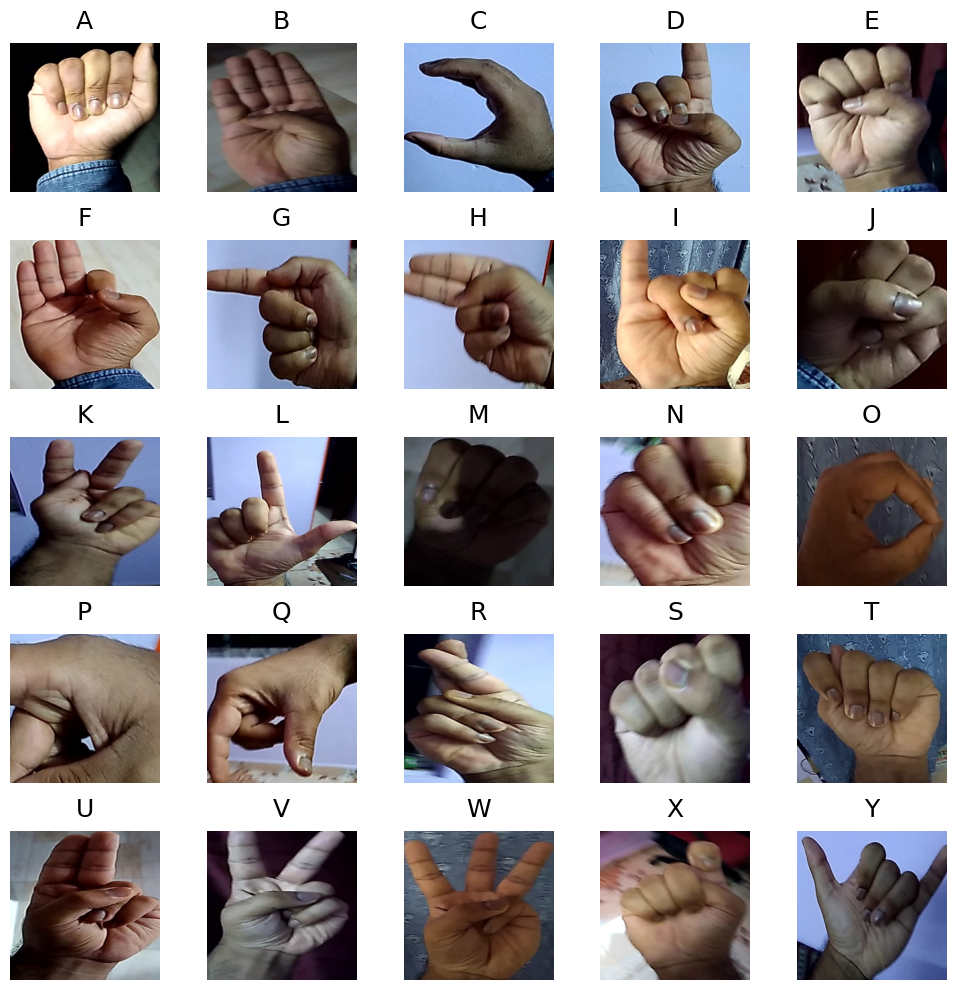

In [11]:

width = 224
height = 224

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i, category in enumerate(sorted(os.listdir(sdir))):
    # Select a random image from the category
    img_path = os.path.join(sdir, category, random.choice(os.listdir(os.path.join(sdir, category))))
    
    # Load and resize the image
    img = Image.open(img_path).resize((width, height))
    
    # Plot the image with the category name as the title
    ax = axes[i//5][i%5]
    ax.imshow(img)
    ax.set_title(category, pad=10, size=18)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:

train_datagen = ImageDataGenerator(rescale = 1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1)
val_datagen = ImageDataGenerator(rescale = 1)

training_set = train_datagen.flow_from_dataframe( train_df, x_col='filepaths', y_col='labels', target_size=(224,224), class_mode='categorical',
                                    color_mode='rgb', shuffle=True)

test_set = test_datagen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=(224,224), class_mode='categorical',
                                    color_mode='rgb', shuffle=False)
val_set = val_datagen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=(224,224), class_mode='categorical',
                                    color_mode='rgb', shuffle=True)


Found 10251 validated image filenames belonging to 25 classes.
Found 570 validated image filenames belonging to 25 classes.
Found 570 validated image filenames belonging to 25 classes.


In [13]:
import keras
import tensorflow as tf
opt = tf.keras.optimizers.Adamax(lr=.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=["accuracy"]
)

/opt/conda/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adamax.py:95: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [14]:
import time 
print(time.ctime())
from time import time
t_start = time()

Tue Jul  4 21:46:04 2023


In [15]:
import keras
import tensorflow as tf
from keras.callbacks import  ReduceLROnPlateau,ModelCheckpoint
annealer=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=4,verbose=1, lr=0.001)
checkpoint = ModelCheckpoint('asl.h5', verbose=1, save_best_only=True, mode='min', save_freq='epoch',monitor='val_loss')


In [16]:
history = model.fit(
                  training_set,
                  validation_data=val_set,
                  epochs=10,
                  batch_size=32,
                  callbacks=[annealer,checkpoint],
                  steps_per_epoch=len(training_set),
                  validation_steps=len(test_set)
                )

Epoch 1/10
321/321 [==============================] - ETA: 0s - loss: 6.1602 - accuracy: 0.8617
Epoch 1: val_loss improved from inf to 3.86602, saving model to asl.h5
321/321 [==============================] - 122s 325ms/step - loss: 6.1602 - accuracy: 0.8617 - val_loss: 3.8660 - val_accuracy: 0.9860 - lr: 0.0010
Epoch 2/10
321/321 [==============================] - ETA: 0s - loss: 2.7128 - accuracy: 0.9862
Epoch 2: val_loss improved from 3.86602 to 1.71331, saving model to asl.h5
321/321 [==============================] - 105s 326ms/step - loss: 2.7128 - accuracy: 0.9862 - val_loss: 1.7133 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 3/10
321/321 [==============================] - ETA: 0s - loss: 1.2176 - accuracy: 0.9918
Epoch 3: val_loss improved from 1.71331 to 0.77982, saving model to asl.h5
321/321 [==============================] - 105s 326ms/step - loss: 1.2176 - accuracy: 0.9918 - val_loss: 0.7798 - val_accuracy: 0.9930 - lr: 0.0010
Epoch 4/10
321/321 [===========================

In [17]:
#time.ctime()
train_time = time() - t_start
print('\nTrain time: %.3f'%(train_time/60), ' mins')


Train time: 18.427  mins


In [18]:
model.save("asl.h5")

import json
np.save('my_history.npy',history.history)
import pandas as pd

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [19]:
from time import time
start = time()
evl = model.evaluate(test_set)
test_time = time() - start

test_loss, test_acc = evl[0]*100, evl[1]*100

msg = f'Test Accuracy = {test_acc:5.2f} %'
msg1 = f'Test Loss = {test_loss:5.2f} %'
msg2 = f'Test Time = {test_time:5.2f} s'
print(msg)
print(msg1)
print(msg2)

18/18 [==============================] - 3s 178ms/step - loss: 0.2234 - accuracy: 0.9982
Test Accuracy = 99.82 %
Test Loss = 22.34 %
Test Time =  5.34 s


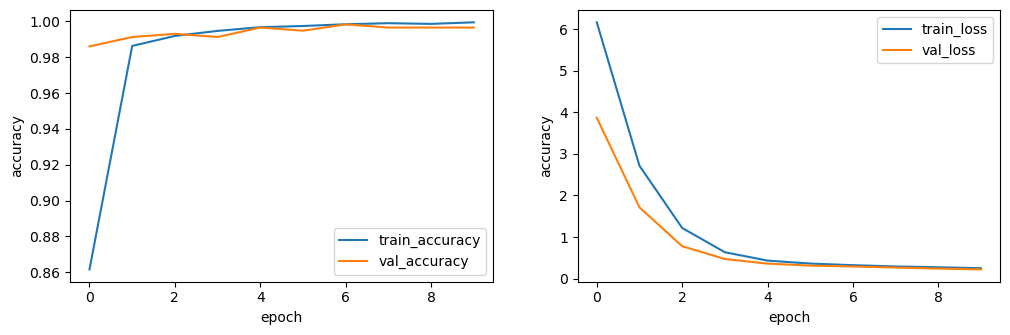

In [20]:
# Plotting Loss & Accuracy Graphs
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(3, 2, 2)
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [21]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

True :  [10  5  8 10 13 15 22 10 15 16  0 18 18 21  1 22  6 13  8 10 14  8 13 19
 22 14 16  4  1  6 21  9  7 11 10 18 20 11 23  4 22  2 24 20 18 12 14  9
 16 11 11  3  3  6 15  7 10  0 10  4 24  8  9 14  9 17  5  2 11 19 13  0
 23  0 23  7 24  6  8  0 16 13 23 15  2 16 17  0 10  7 13 13 10 17 19 11
 23  1 23  1  6 21  2  2 12 18 19 18  6 17  1 20  8  2 24 16 10 17 15  7
 22  6 22 18 22 23 24 23  5  2  1  9 17 21 24 15  3 19 15 14  4 22 13 23
  6  1 17  1 10 21  2 24  3 14 24 16 19 22  7 11 15 24 16 16  9 15 16 10
  5 11  7  7 16 19  0 21 19  0 20 16 13 12 14 14 16 22 18 22 12 21  4  3
 23  0  8 15  4  3 18  4 22 24  9  5 23  5  4  4  3  6  3  0 10  8 12  9
 18 19 12  8 18 19 10  8 18  4 23  5 20 24 23 10 20  5  1  0  7  4 20  7
 24 22  6  5 15 19  9 20 16 22 17 10  8  7 16 20 19  8 24  5 17 17 16 13
 16  5 24 13  6 14  8 24 19 17  7 12 21  7 11 18 14  7 11 23  2 17  7 13
 19 11  9  0  8 12 12 15 15  4 17  6 23 12 23  4 16  9 10 12 15  1 13  3
 24 15 15 17  2 14 14 21 17 18 15  2  1 17 

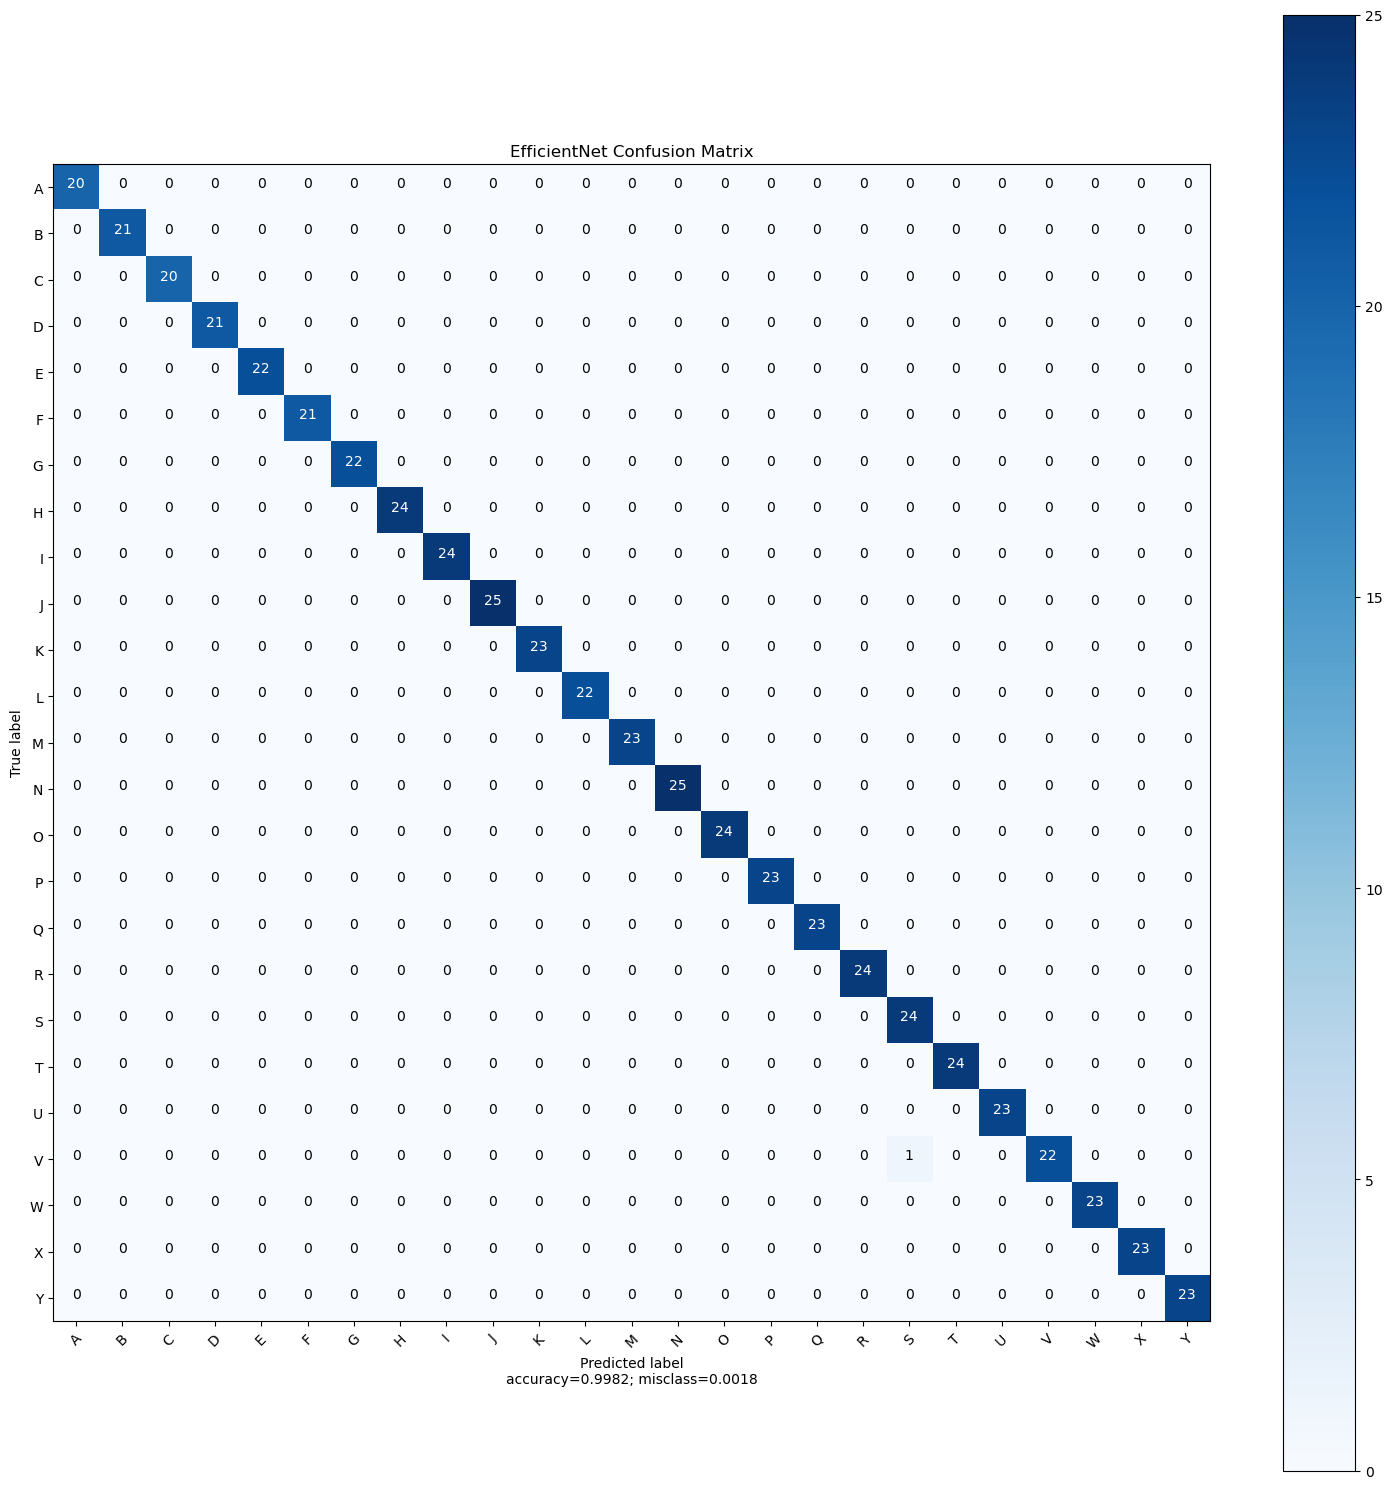

In [22]:
from sklearn.metrics import confusion_matrix

classes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
          "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
y_true = np.array(test_set.labels)
print("True : ", y_true)

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
print("Predicted : ", y_pred)

conf_mat = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(cm           = conf_mat,
                      normalize    = False,
                      target_names = classes,
                      title        = "EfficientNet Confusion Matrix")

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred,target_names=classes,digits=4))

              precision    recall  f1-score   support

           A     1.0000    1.0000    1.0000        20
           B     1.0000    1.0000    1.0000        21
           C     1.0000    1.0000    1.0000        20
           D     1.0000    1.0000    1.0000        21
           E     1.0000    1.0000    1.0000        22
           F     1.0000    1.0000    1.0000        21
           G     1.0000    1.0000    1.0000        22
           H     1.0000    1.0000    1.0000        24
           I     1.0000    1.0000    1.0000        24
           J     1.0000    1.0000    1.0000        25
           K     1.0000    1.0000    1.0000        23
           L     1.0000    1.0000    1.0000        22
           M     1.0000    1.0000    1.0000        23
           N     1.0000    1.0000    1.0000        25
           O     1.0000    1.0000    1.0000        24
           P     1.0000    1.0000    1.0000        23
           Q     1.0000    1.0000    1.0000        23
           R     1.0000    

In [24]:
from sklearn.metrics import confusion_matrix

classes =  ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
          "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
y_pred = model.predict(val_set)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
y_true = np.array(val_set.labels)
print(y_true)

18/18 [==============================] - 2s 87ms/step
[19  7  0 11 10  7  5 19  2  4 14 17  0  5  6 13  5 15 11  9  3 24  0 23
 15 18 21 18 23  2 23  3 22  7 19 18 21  7 13  1 19 13  0 17 22 10  0 16
  5 15 16 19 19  4  9  1 23 16 11 17 15 20  6  7 13  6 23 20  7  7 10 12
 24 24 24 24  8 21  4 22  5 16 13 20  7  1 15  5 22  7  5 10 10 12  6 14
  8 12 21  7 12  0  8 24 14  4 24 16 16  6 17  6 24  0 15  5 18 10 15 20
 14 12 19 22 17 13 10  3 13 10 20 14  1 11 13 17  1  3 23  8  7  2 22 13
  3  7  4 12 14 12  3  5  8  2 11 17  0  5 22 19 21 13 13 21  8  1  7  7
  2 22  9 10 22 24 14  3  3  1  9 21 11 20  7 14 19  1 21 18  9  2  6  8
  0  1 23 23  9 20  2  2 17 24 22 22 24 23 15 10 11 22 11  9 21  2 23 12
 15 24  9  0 19 13 18  3  7  3  6 11 10 18  8 16 10  8  5  9 16 20 16 23
 10  9 24  5  1  3  9 23 10  8 18 15 12 20 23 16 23 11 16  8 14  2 15 19
  4  8  1 14  4  6 15 13 17  3 22 16  9 15  9 14  5 12  6 20 12  2 22 18
  7 17 12  2 14 14 20  2  1 16 15 16  9 24  5 12 17 18  2 20 21 23 19 

In [25]:
model.evaluate(test_set)

18/18 [==============================] - 2s 86ms/step - loss: 0.2234 - accuracy: 0.9982


[0.22341574728488922, 0.9982455968856812]

In [26]:
model.evaluate(val_set)

18/18 [==============================] - 2s 86ms/step - loss: 0.2227 - accuracy: 0.9965


[0.22268980741500854, 0.9964912533760071]

In [27]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('asl_effT.tflite', 'wb') as f:
    f.write(tflite_model)

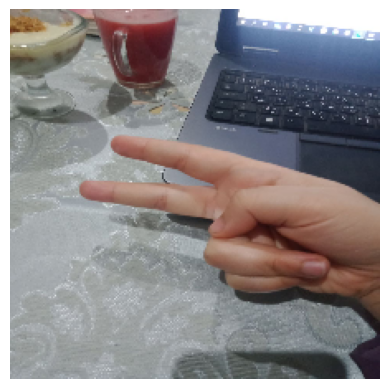

1/1 [==============================] - 2s 2s/step
The predicted class is H with a confidence of 34.01%.


In [28]:



# Define image size
img_height, img_width = 224, 224
# Load the image
test_apple_url = "/kaggle/input/testdata/h.jpg"
img = tf.keras.utils.load_img(test_apple_url, target_size=(img_height, img_width))

# Convert image to array
img_array = tf.keras.utils.img_to_array(img)
img_array = np.uint8(img_array)


class_names= ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
          "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
# Display the image
plt.imshow(img_array)
plt.axis('off')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
# Make predictions on the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence_score = predictions[0][predicted_class]

# Print the prediction results
print("The predicted class is {} with a confidence of {:.2f}%."
      .format(class_names[predicted_class], confidence_score * 100))





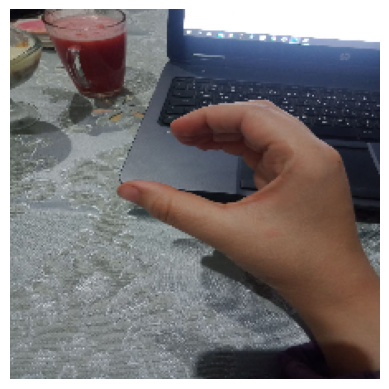

1/1 [==============================] - 0s 33ms/step
The predicted class is C with a confidence of 84.27%.


In [29]:



# Define image size
img_height, img_width = 224, 224
# Load the image
test_apple_url = "/kaggle/input/testdata/c.jpg"
img = tf.keras.utils.load_img(test_apple_url, target_size=(img_height, img_width))

# Convert image to array
img_array = tf.keras.utils.img_to_array(img)
img_array = np.uint8(img_array)


class_names= ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
          "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
# Display the image
plt.imshow(img_array)
plt.axis('off')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
# Make predictions on the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence_score = predictions[0][predicted_class]

# Print the prediction results
print("The predicted class is {} with a confidence of {:.2f}%."
      .format(class_names[predicted_class], confidence_score * 100))





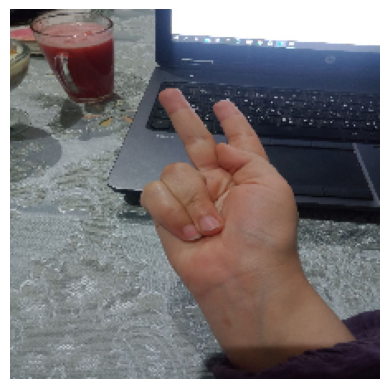

1/1 [==============================] - 0s 34ms/step
The predicted class is K with a confidence of 91.65%.


In [30]:



# Define image size
img_height, img_width = 224, 224
# Load the image
test_apple_url = "/kaggle/input/testdata/k.jpg"
img = tf.keras.utils.load_img(test_apple_url, target_size=(img_height, img_width))

# Convert image to array
img_array = tf.keras.utils.img_to_array(img)
img_array = np.uint8(img_array)


class_names= ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
          "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
# Display the image
plt.imshow(img_array)
plt.axis('off')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
# Make predictions on the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence_score = predictions[0][predicted_class]

# Print the prediction results
print("The predicted class is {} with a confidence of {:.2f}%."
      .format(class_names[predicted_class], confidence_score * 100))





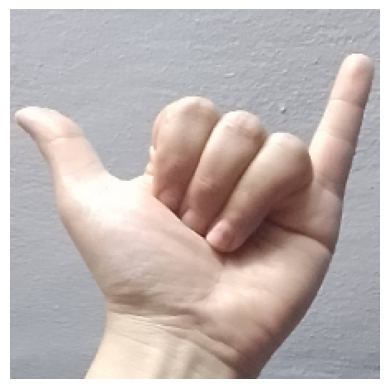

1/1 [==============================] - 0s 32ms/step
The predicted class is Y with a confidence of 98.32%.


In [31]:



# Define image size
img_height, img_width = 224, 224
# Load the image
test_apple_url = "/kaggle/input/testdata/photo_2023-05-07_22-05-56.jpg"
img = tf.keras.utils.load_img(test_apple_url, target_size=(img_height, img_width))

# Convert image to array
img_array = tf.keras.utils.img_to_array(img)
img_array = np.uint8(img_array)


class_names= ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
          "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
# Display the image
plt.imshow(img_array)
plt.axis('off')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
# Make predictions on the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence_score = predictions[0][predicted_class]

# Print the prediction results
print("The predicted class is {} with a confidence of {:.2f}%."
      .format(class_names[predicted_class], confidence_score * 100))





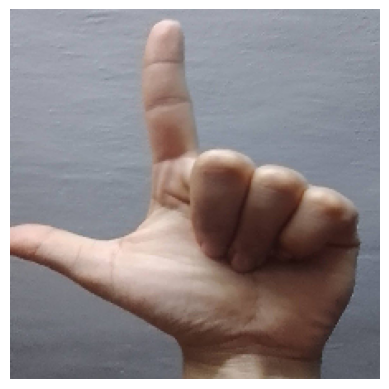

1/1 [==============================] - 0s 33ms/step
The predicted class is L with a confidence of 99.36%.


In [32]:



# Define image size
img_height, img_width = 224, 224
# Load the image
test_apple_url = "/kaggle/input/testdata/photo_2023-05-07_22-05-59.jpg"
img = tf.keras.utils.load_img(test_apple_url, target_size=(img_height, img_width))

# Convert image to array
img_array = tf.keras.utils.img_to_array(img)
img_array = np.uint8(img_array)


class_names= ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
          "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
# Display the image
plt.imshow(img_array)
plt.axis('off')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
# Make predictions on the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence_score = predictions[0][predicted_class]

# Print the prediction results
print("The predicted class is {} with a confidence of {:.2f}%."
      .format(class_names[predicted_class], confidence_score * 100))





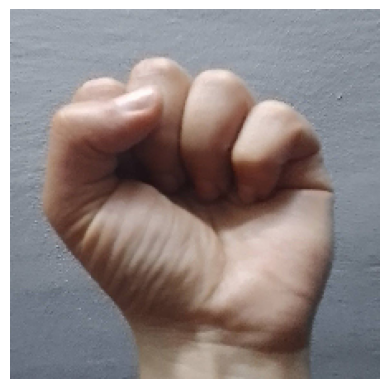

1/1 [==============================] - 0s 39ms/step
The predicted class is S with a confidence of 86.60%.


In [33]:



# Define image size
img_height, img_width = 224, 224
# Load the image
test_apple_url = "/kaggle/input/testdata/photo_2023-05-07_22-06-02.jpg"
img = tf.keras.utils.load_img(test_apple_url, target_size=(img_height, img_width))

# Convert image to array
img_array = tf.keras.utils.img_to_array(img)
img_array = np.uint8(img_array)


class_names= ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
          "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
# Display the image
plt.imshow(img_array)
plt.axis('off')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
# Make predictions on the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence_score = predictions[0][predicted_class]

# Print the prediction results
print("The predicted class is {} with a confidence of {:.2f}%."
      .format(class_names[predicted_class], confidence_score * 100))





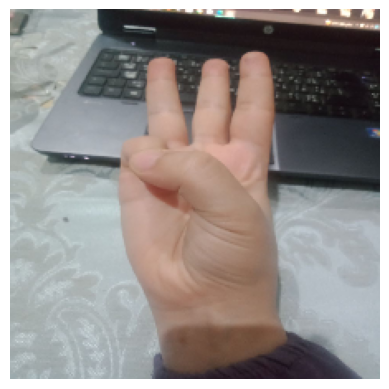

1/1 [==============================] - 0s 34ms/step
The predicted class is W with a confidence of 30.19%.


In [34]:



# Define image size
img_height, img_width = 224, 224
# Load the image
test_apple_url = "/kaggle/input/testdata/photo_2023-05-07_22-34-28.jpg"
img = tf.keras.utils.load_img(test_apple_url, target_size=(img_height, img_width))

# Convert image to array
img_array = tf.keras.utils.img_to_array(img)
img_array = np.uint8(img_array)


class_names= ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
          "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
# Display the image
plt.imshow(img_array)
plt.axis('off')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
# Make predictions on the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence_score = predictions[0][predicted_class]

# Print the prediction results
print("The predicted class is {} with a confidence of {:.2f}%."
      .format(class_names[predicted_class], confidence_score * 100))





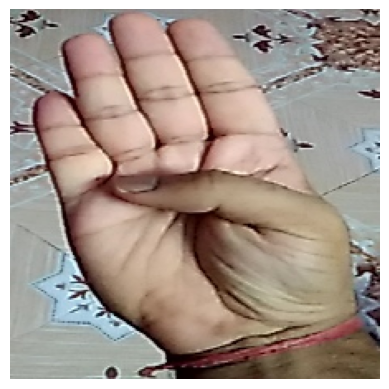

1/1 [==============================] - 0s 32ms/step
The predicted class is B with a confidence of 98.50%.


In [35]:



# Define image size
img_height, img_width = 224, 224
# Load the image
test_apple_url = "/kaggle/input/sign-language-dataset/ImagePro/B/2021-07-24_21-29-13.jpg"
img = tf.keras.utils.load_img(test_apple_url, target_size=(img_height, img_width))

# Convert image to array
img_array = tf.keras.utils.img_to_array(img)
img_array = np.uint8(img_array)


class_names= ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
          "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
# Display the image
plt.imshow(img_array)
plt.axis('off')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
# Make predictions on the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence_score = predictions[0][predicted_class]

# Print the prediction results
print("The predicted class is {} with a confidence of {:.2f}%."
      .format(class_names[predicted_class], confidence_score * 100))





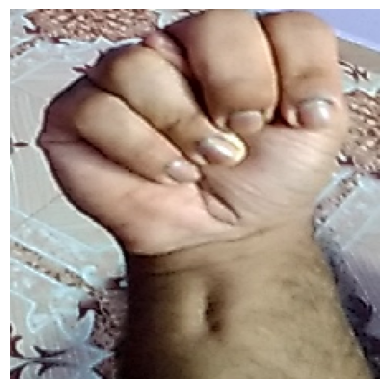

1/1 [==============================] - 0s 32ms/step
The predicted class is N with a confidence of 98.11%.


In [36]:



# Define image size
img_height, img_width = 224, 224
# Load the image
test_apple_url = "/kaggle/input/sign-language-dataset/ImagePro/N/2021-07-25_21-18-36.jpg"
img = tf.keras.utils.load_img(test_apple_url, target_size=(img_height, img_width))

# Convert image to array
img_array = tf.keras.utils.img_to_array(img)
img_array = np.uint8(img_array)


class_names= ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L",
          "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
# Display the image
plt.imshow(img_array)
plt.axis('off')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
# Make predictions on the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence_score = predictions[0][predicted_class]

# Print the prediction results
print("The predicted class is {} with a confidence of {:.2f}%."
      .format(class_names[predicted_class], confidence_score * 100))



